In [1]:
'''ECE 143 Project'''

import csv
import numpy as np
from collections import Counter

# Other functions
import movie_plots

# load MoviesOnStreamingPlatforms csv and IMDBMovieData csv
MoviesData = []
with open('MoviesOnStreamingPlatforms_updated.csv', encoding="utf8") as MoviesCSVFile:
    MoviesCSVReader = csv.reader(MoviesCSVFile)
    MovieData = list(MoviesCSVReader)
    NumMovies = len(MovieData)

IMDBData = []
with open('IMDB-Movie-Data.csv', encoding="utf8") as IMDBDataFile:
    IMDBDataReader = csv.reader(IMDBDataFile)
    IMDBData = list(IMDBDataReader)

In [2]:
# Adjust age ratings data so that if there is no age rating entry, it is replaced with "not rated"
AdjustedMovieData = [['not rated' if all([not AgeRating, i == 4]) else AgeRating for i, AgeRating in enumerate(MovieEntry)] for MovieEntry in MovieData[1:]]

# Extract and plot data on age ratings
# ----------------------------------------------------------------------------------------------------------------------------------
NetflixAgeRatingsTemp = [row[4] for row in AdjustedMovieData if int(row[7]) == 1]
HuluAgeRatingsTemp = [row[4] for row in AdjustedMovieData if int(row[8]) == 1]
PrimeAgeRatingsTemp = [row[4] for row in AdjustedMovieData if int(row[9]) == 1]
DisneyAgeRatingsTemp = [row[4] for row in AdjustedMovieData if int(row[10]) == 1]

# Make pie chart of movie age ratings, consider empty data entries as unrated films
# Netflix plot
NetflixAgesDict = Counter(NetflixAgeRatingsTemp)
movie_plots.movie_pie_charts(NetflixAgesDict, "Netflix Movie Age Ratings", "NetflixAgeRatingsChart.png")

# Hulu Plot
HuluAgesDict = Counter(HuluAgeRatingsTemp)
movie_plots.movie_pie_charts(HuluAgesDict, "Hulu Movie Age Ratings", "HuluAgeRatingsChart.png")

# Prime Plot
PrimeAgesDict = Counter(PrimeAgeRatingsTemp)
movie_plots.movie_pie_charts(PrimeAgesDict, "Prime Movie Age Ratings", "PrimeAgeRatingsChart.png")

# Disney Plot
DisneyAgesDict = Counter(DisneyAgeRatingsTemp)
movie_plots.movie_pie_charts(DisneyAgesDict, "Disney Movie Age Ratings", "DisneyAgeRatingsChart.png")


In [12]:
def movie_pie_charts_improved(DataDict, Title, Filename, ExplodeList=[]):
    '''
    This function outputs a pie chart of the input DataDict and saves the figure under Filename
    :param DataDict: Dictionary of number of instances of each possible data value (e.g. {'Action Movies': 22, 'Comedy Movies': 43})
    :param Title: Title of figure
    :param Filename: Filename of saved pie chart figure
    :param ExplodeList: List of the amount of separation between pie slices in the pie chart (bigger values mean more separation)
    :type DataDict: dictionary 
    :type Title: string
    :type Filename: string
    :type ExplodeList: list
    '''
    assert isinstance(DataDict, dict), "Input data must be a dictionary"
    assert isinstance(Title, str), "Title must be a string"
    assert isinstance(Filename, str), "Filename must be a string"
    assert isinstance(ExplodeList, list), "ExplodeList must be a list"
    
    import matplotlib.pyplot as plt
    

    pie, _ = plt.subplots(figsize=[5,5])
    labels = DataDict.keys()
    
    plt.pie(x=DataDict.values(), labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle 
    plt.set_cmap('PuBuGn')
    plt.title(Title, fontsize=18)
    plt.tight_layout()
    plt.show()

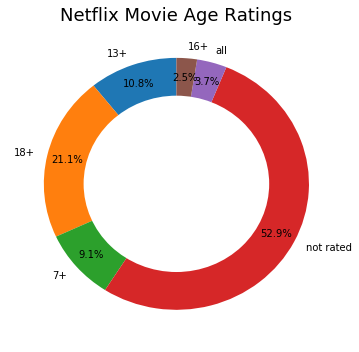

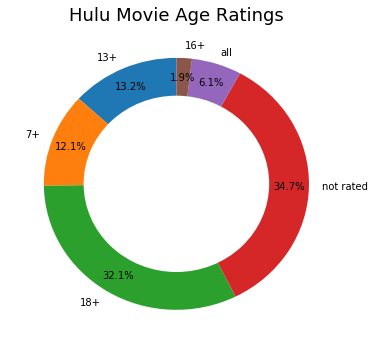

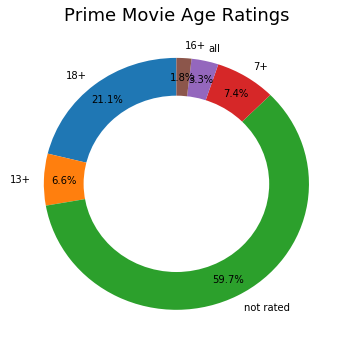

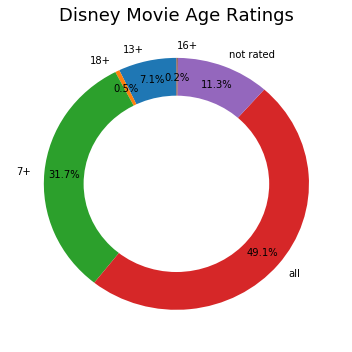

In [13]:
# Adjust age ratings data so that if there is no age rating entry, it is replaced with "not rated"
AdjustedMovieData = [['not rated' if all([not AgeRating, i == 4]) else AgeRating for i, AgeRating in enumerate(MovieEntry)] for MovieEntry in MovieData[1:]]

# Extract and plot data on age ratings
# ----------------------------------------------------------------------------------------------------------------------------------
NetflixAgeRatingsTemp = [row[4] for row in AdjustedMovieData if int(row[7]) == 1]
HuluAgeRatingsTemp = [row[4] for row in AdjustedMovieData if int(row[8]) == 1]
PrimeAgeRatingsTemp = [row[4] for row in AdjustedMovieData if int(row[9]) == 1]
DisneyAgeRatingsTemp = [row[4] for row in AdjustedMovieData if int(row[10]) == 1]

# Make pie chart of movie age ratings, consider empty data entries as unrated films
# Netflix plot
NetflixAgesDict = Counter(NetflixAgeRatingsTemp)
movie_pie_charts_improved(NetflixAgesDict, "Netflix Movie Age Ratings", "NetflixAgeRatingsChart.png")

# Hulu Plot
HuluAgesDict = Counter(HuluAgeRatingsTemp)
movie_pie_charts_improved(HuluAgesDict, "Hulu Movie Age Ratings", "HuluAgeRatingsChart.png")

# Prime Plot
PrimeAgesDict = Counter(PrimeAgeRatingsTemp)
movie_pie_charts_improved(PrimeAgesDict, "Prime Movie Age Ratings", "PrimeAgeRatingsChart.png")

# Disney Plot
DisneyAgesDict = Counter(DisneyAgeRatingsTemp)
movie_pie_charts_improved(DisneyAgesDict, "Disney Movie Age Ratings", "DisneyAgeRatingsChart.png")


In [ ]:
# ----------------------------------------------------------------------------------------------------------------------------------

# Extract and plot genre data
# ----------------------------------------------------------------------------------------------------------------------------------
NetflixGenresTemp = [row[13].split(',') for row in AdjustedMovieData if int(row[7]) == 1]
HuluGenresTemp = [row[13].split(',') for row in AdjustedMovieData if int(row[8]) == 1]
PrimeGenresTemp = [row[13].split(',') for row in AdjustedMovieData if int(row[9]) == 1]
DisneyGenresTemp = [row[13].split(',') for row in AdjustedMovieData if int(row[10]) == 1]

# Flattens the nested lists, so that usage of Counter is possible
NetflixGenres = sum(NetflixGenresTemp, [])
HuluGenres = sum(HuluGenresTemp, [])
PrimeGenres = sum(PrimeGenresTemp, [])
DisneyGenres = sum(DisneyGenresTemp, [])

# Netflix Plot
NetflixGenresDict = Counter(NetflixGenres)
DictSize = len(NetflixGenresDict)
ExplodeListNetflix = [0.1]*DictSize
movie_plots.movie_pie_charts(NetflixGenresDict, "Netflix Movies Genres", "NetflixMoviesGenres.png", ExplodeListNetflix)

# Hulu Plot
HuluGenresDict = Counter(HuluGenres)
DictSize = len(HuluGenresDict)
ExplodeListHulu = [0.1]*DictSize
movie_plots.movie_pie_charts(HuluGenresDict, "Hulu Movies Genres", "HuluMoviesGenres.png", ExplodeListHulu)

# Prime Plot
PrimeGenresDict = Counter(PrimeGenres)
DictSize = len(PrimeGenresDict)
ExplodeListPrime = [0.1]*DictSize
movie_plots.movie_pie_charts(PrimeGenresDict, "Prime Movies Genres", "PrimeMoviesGenres.png", ExplodeListPrime)

# Disney Plot
DisneyGenresDict = Counter(DisneyGenres)
DictSize = len(DisneyGenresDict)
ExplodeListDisney = [0.1]*DictSize
movie_plots.movie_pie_charts(DisneyGenresDict, "Disney Movies Genres", "DisneyMoviesGenres.png", ExplodeListDisney)

# ----------------------------------------------------------------------------------------------------------------------------------

# Extract and plot IMDB ratings
# ----------------------------------------------------------------------------------------------------------------------------------
NetflixIMDBScores = [float(row[5]) for row in AdjustedMovieData if int(row[7]) == 1 if row[5]]
HuluIMDBScores = [float(row[5]) for row in AdjustedMovieData if int(row[8]) == 1 if row[5]]
PrimeIMDBScores = [float(row[5]) for row in AdjustedMovieData if int(row[9]) == 1 if row[5]]
DisneyIMDBScores = [float(row[5]) for row in AdjustedMovieData if int(row[10]) == 1 if row[5]]

# Make new age lists which don't include data points that don't have an IMDB score
NetflixIMDBAges = [row[4] for row in AdjustedMovieData if int(row[7]) == 1 if row[5]]
HuluIMDBAges = [row[4] for row in AdjustedMovieData if int(row[8]) == 1 if row[5]]
PrimeIMDBAges = [row[4] for row in AdjustedMovieData if int(row[9]) == 1 if row[5]]
DisneyIMDBAges = [row[4] for row in AdjustedMovieData if int(row[10]) == 1 if row[5]]

IMDBScores = [NetflixIMDBScores, HuluIMDBScores, PrimeIMDBScores, DisneyIMDBScores]
IMDBAges = [NetflixIMDBAges, HuluIMDBAges, PrimeIMDBAges, DisneyIMDBAges]

movie_plots.movie_scatter_plots(IMDBScores, "IMDB Scores", 'IMDBScoresScatterPlot.png', IMDBAges, "Ages")
# ----------------------------------------------------------------------------------------------------------------------------------

# Extract and plot Rotten Tomato ratings
# ----------------------------------------------------------------------------------------------------------------------------------
NetflixRTScores = [float(row[6].replace('%', '')) for row in AdjustedMovieData if int(row[7]) == 1 if row[6]]
HuluRTScores = [float(row[6].replace('%', '')) for row in AdjustedMovieData if int(row[8]) == 1 if row[6]]
PrimeRTScores = [float(row[6].replace('%', '')) for row in AdjustedMovieData if int(row[9]) == 1 if row[6]]
DisneyRTScores = [float(row[6].replace('%', '')) for row in AdjustedMovieData if int(row[10]) == 1 if row[6]]

# Make new age lists which don't include data points that don't have an IMDB score
NetflixRTAges = [row[4] for row in AdjustedMovieData if int(row[7]) == 1 if row[6]]
HuluRTAges = [row[4] for row in AdjustedMovieData if int(row[8]) == 1 if row[6]]
PrimeRTAges = [row[4] for row in AdjustedMovieData if int(row[9]) == 1 if row[6]]
DisneyRTAges = [row[4] for row in AdjustedMovieData if int(row[10]) == 1 if row[6]]

RTScores = [NetflixRTScores, HuluRTScores, PrimeRTScores, DisneyRTScores]
RTAges = [NetflixRTAges, HuluRTAges, PrimeRTAges, DisneyRTAges]

movie_plots.movie_scatter_plots(RTScores, "Rotten Tomato Scores", 'RottenTomatoScoresScatterPlot.png', RTAges, "Ages")
# ----------------------------------------------------------------------------------------------------------------------------------

# Make plot showing which streaming platforms have the 1000 most popular movies (according to IMDB)
# ----------------------------------------------------------------------------------------------------------------------------------
# The goal figure here was to have a rectangular grid where each row represents a movie on the 1000 most popular movies list
# and each column represents a streaming platform.  A grid square will be filled in with one color if the streaming platform 
# has the movie or filled in with a different color if the streaming platform does not have the movie.

# Only plot first 30 most popular movies for now (for plot spacing reasons)
MaxEntry = 30
MostPopMovies = [row[1] for row in IMDBData[1:]]

NetflixMovies = [row[2] for row in AdjustedMovieData if int(row[7]) == 1]
PrimeMovies = [row[2] for row in AdjustedMovieData if int(row[8]) == 1]
HuluMovies = [row[2] for row in AdjustedMovieData if int(row[9]) == 1]
DisneyMovies = [row[2] for row in AdjustedMovieData if int(row[10]) == 1]

NetflixPopMovies = [1.0 if movie in NetflixMovies else 0.0 for movie in MostPopMovies]
PrimePopMovies = [1.0 if movie in PrimeMovies else 0.0 for movie in MostPopMovies]
HuluPopMovies = [1.0 if movie in HuluMovies else 0.0 for movie in MostPopMovies]
DisneyPopMovies = [1.0 if movie in DisneyMovies else 0.0 for movie in MostPopMovies]

TempList = [NetflixPopMovies[0:MaxEntry], PrimePopMovies[0:MaxEntry], HuluPopMovies[0:MaxEntry], DisneyPopMovies[0:MaxEntry]]
PopMoviesArray = np.asarray(TempList, dtype=np.float32)

StreamingPlatformsList = ["Netflix", "Prime", "Hulu", "Disney+"]
movie_plots.heatmap_plots(np.transpose(PopMoviesArray), MostPopMovies[0:MaxEntry], StreamingPlatformsList, "PopularMoviesHeatmap.png")

# ----------------------------------------------------------------------------------------------------------------------------------

# Bar graph of # of popular movies each streaming platform has
# ----------------------------------------------------------------------------------------------------------------------------------
NetflixPopMoviesCount = sum(NetflixPopMovies)
HuluPopMoviesCount = sum(HuluPopMovies)
PrimePopMoviesCount = sum(PrimePopMovies)
DisneyPopMoviesCount = sum(DisneyPopMovies)

PopMoviesCount = [NetflixPopMoviesCount, HuluPopMoviesCount, PrimePopMoviesCount, DisneyPopMoviesCount]
Data1Name = "Popular Movies Count"
Filename="BarChartPopMoviesCount.png"

movie_plots.movies_bar_charts(StreamingPlatformsList, PopMoviesCount, Data1Name, Filename)
